<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Deep Learning for Computer Vision
 

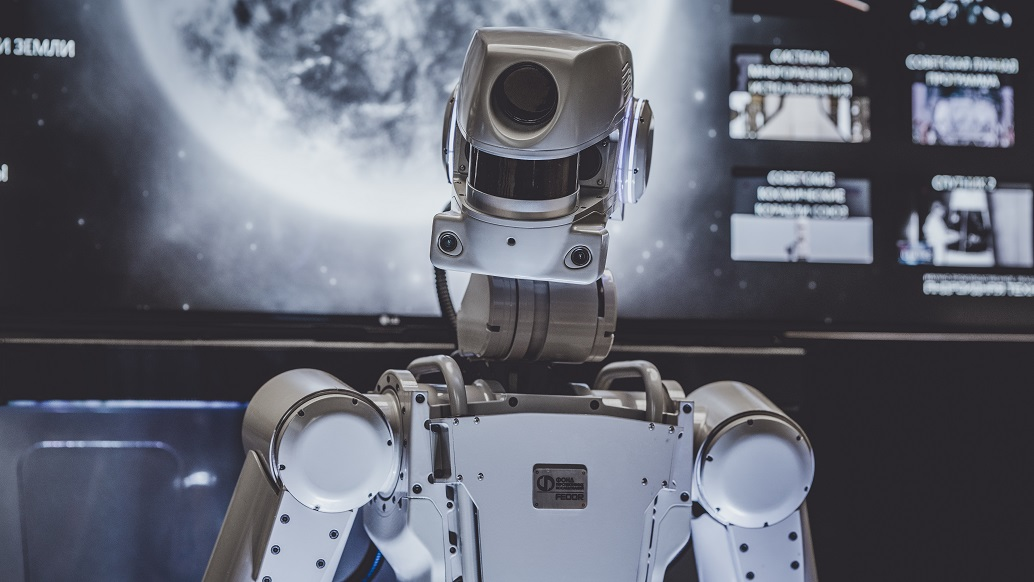

Photo by <a href="https://unsplash.com/@tetrakiss?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Arseny Togulev</a> on <a href="https://unsplash.com/s/photos/robot?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Three essential types of problems in Computer Vision --
1. **Image Classifiaction** : It can be single-label classification (when an image belong to one class or another) or  multi-label clasification (when multiple classes can be identified within an image).
2. **Image Sementation** : When the goal is to divide an image into different areas - such that each area is a class or category.
3. **Object Detection** : When you need to create bounding boxes around a class with in an image. There can be multiple categories or classes within an image.

Several other niche CV tasks are also there, for example - Image similarity scoring, keypoint detection like face detetction use-case, pose estimation, 3D mesh estimation *etc.*

## Image Segmentation
* Using a model to asign a class to each pixel in an image.
* You end up *segmenting* the image into different zones like background, foreground, road, car, pedesterian, sidewalk, *etc.*
* Two categories :
  1. **Semantic Segmentation** : Each cat in an image will be labeled as cats, a generic class.
  2. **Instance Segmentation** : Cats will be labeled as cat1 and cat2, two separate classes. It parses out individual object instances as well.

* In follwoing example we will perform *Semantic Segmentation*. We will learn how to separarte the main subject from its background. (*Interesting!*⚡)
* We wil be using Oxford-IIIT Pets dataset which has 7390 images of various breeds of cats and dogs. It has *foreground-background segmentation masks* for each pictiure as well.
* Pixels in the segmentation maskk can take one of threeinteger values -
  1. 1 for foreground,
  2. 2 for backgound
  3. 3 for contour

In [ ]:
#ddownloading the data
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz


In [2]:
#creating list of filename paths and maskfile paths 
import os
input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted([os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(".jpg")])

target_paths = sorted([os.path.join(target_dir, fname) for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")])

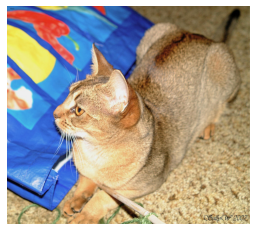

In [4]:
#Looking at an example image  --
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

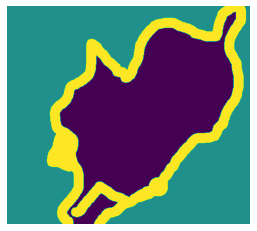

In [8]:
#Lets look at the corresponding segmmentation mask (target) too --
def display_target(target_array):
  normalized_array = (target_array.astype("uint8")-1)*127
  plt.axis("off")
  plt.imshow(normalized_array[:,:, 0])

img = img_to_array(load_img(target_paths[9], color_mode = "grayscale"))
display_target(img)

Loadig data -
* Load inputs and target into numpy arays
* Split the arrays into trainand val sets

In [ ]:
import numpy as np
import random

img_size = (200,200)
num_imgs = llen(input_img_paths)